<a href="https://colab.research.google.com/github/lawrencerowland/py3plex/blob/master/stakeholder_objectives.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from py3plex.core import multinet
from py3plex.visualization.multilayer import draw_multiedges, draw_multilayer_default, hairball_plot, plt
from py3plex.visualization.colors import all_color_names,colors_default
import networkx as nx

A = multinet.multi_layer_network()

# Edges  added as lists: [n1,l1,n2,l2,w]
objectives = [["sustain_carbon", "objectives", "new_station", "objectives", 10],
          ["sustain_carbon", "objectives", "New_construction_method", "objectives", 7],
           ["faster_trains", "objectives", "new_station", "objectives", 5],]

stakeholders = [["Town_council", "stakeholders", "Train_Operator", "stakeholders", .4],
           ["Town_council", "stakeholders", "Safety_Board", "stakeholders", .1],
           ["Safety_Board", "stakeholders", "Train_manufacturer", "stakeholders", .6]]

scope = [["civil_works", "scope", "new_track", "scope", .7],
         ["in_cab_signalling", "scope", "new_track", "scope", .6],
         ["new_trains", "scope", "new_track", "scope", .7],
         ["new_trains", "scope", "in_cab_signalling", "scope", .9],
         ["telecoms", "scope", "in_cab_signalling", "scope", .9],
         ["telecoms", "scope", "new_trains", "scope", .9]]

inter_layer_edges = [["sustain_carbon", "objectives", "Town_council", "stakeholders", .6],
                     ["sustain_carbon", "objectives", "Train_manufacturer", "stakeholders", .6],
                     ["faster_trains", "objectives", "Train_manufacturer", "stakeholders", 1],
                     ["faster_trains", "objectives", "Safety_Board", "stakeholders", .8],
                     ["new_trains", "scope", "faster_trains", "objectives", .9],
                     ["civil_works", "scope", "New_construction_method", "objectives", .7],
                     ["new_track", "scope", "sustain_carbon", "objectives", .5],
                     ["civil_works", "scope", "new_station", "objectives", .6],
                     ["new_trains", "scope", "faster_trains", "objectives", .9],
                     ["new_trains", "scope", "Safety_Board", "stakeholders", .7],
                     ["new_trains", "scope", "Train_manfacturer", "stakeholders", 1],
                     ["telecoms", "scope", "Safety_Board", "stakeholders", .6],
                     ["in_cab_signalling", "scope", "Train_Operator", "stakeholders", .6],
                     ["civil_works", "scope", "Town_council", "stakeholders", .4],
                     ["new_trains", "scope", "Safety_Board", "stakeholders", .9]]

In [49]:
# specify that input is list
A.add_edges(objectives, input_type="list")
A.add_edges(stakeholders, input_type="list")
A.add_edges(inter_layer_edges, input_type="list")
A.basic_stats()

print(list(A.get_edges()))

-------------------- 
 Computing core stats of the network 
 --------------------
MultiDiGraph with 14 nodes and 21 edges
Number of unique node IDs: 9
[(('sustain_carbon', 'objectives'), ('new_station', 'objectives')), (('sustain_carbon', 'objectives'), ('New_construction_method', 'objectives')), (('sustain_carbon', 'objectives'), ('Town_council', 'stakeholders')), (('sustain_carbon', 'objectives'), ('Train_manufacturer', 'stakeholders')), (('faster_trains', 'objectives'), ('new_station', 'objectives')), (('faster_trains', 'objectives'), ('Train_manufacturer', 'stakeholders')), (('faster_trains', 'objectives'), ('Safety_Board', 'stakeholders')), (('Town_council', 'stakeholders'), ('Train_Operator', 'stakeholders')), (('Town_council', 'stakeholders'), ('Safety_Board', 'stakeholders')), (('Safety_Board', 'stakeholders'), ('Train_manufacturer', 'stakeholders')), (('new_trains', 'scope'), ('faster_trains', 'objectives')), (('new_trains', 'scope'), ('faster_trains', 'objectives')), (('new_t

-------------------- 
 Network splitting in progress 
 --------------------
Beginning parsing..


100%|██████████| 100/100 [00:00<00:00, 1290.45it/s]

BarnesHut Approximation  took  0.02  seconds
Repulsion forces  took  0.04  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.01  seconds


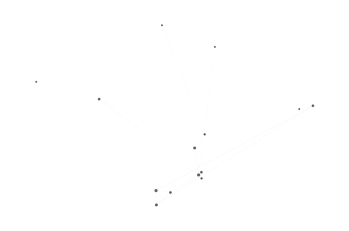

<Figure size 432x288 with 0 Axes>

In [53]:
A.visualize_network(style="hairball")
plt.show()
plt.clf()

-------------------- 
 Network splitting in progress 
 --------------------


100%|██████████| 100/100 [00:00<00:00, 7133.17it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████| 100/100 [00:00<00:00, 5510.63it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████| 100/100 [00:00<00:00, 8327.65it/s]

BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds
Finished with layout..


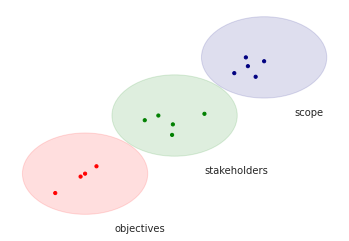

In [50]:
network_labels, graphs, multilinks = A.get_layers() 
# just show the layers 
draw_multilayer_default(graphs,
                        display=False,
                        background_shape="circle",
                        labels=network_labels)

-------------------- 
 Network splitting in progress 
 --------------------


100%|██████████| 100/100 [00:00<00:00, 5270.55it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████| 100/100 [00:00<00:00, 3560.83it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.02  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████| 100/100 [00:00<00:00, 7874.56it/s]


BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds
Finished with layout..
MultiDiGraph with 4 nodes and 3 edges
MultiDiGraph with 5 nodes and 3 edges
MultiDiGraph with 5 nodes and 0 edges


100%|██████████| 1/1 [00:00<00:00, 37.28it/s]


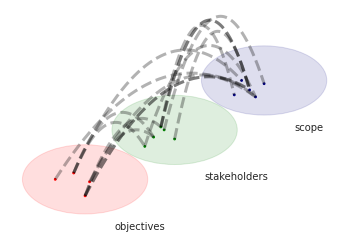

<Figure size 432x288 with 0 Axes>

In [54]:
A.visualize_network(style="diagonal",
                                     resolution=0.001,
                                     linepoints="-",
                                     linewidth=3)
plt.show()
plt.clf()
#even simpler A.visualize_network()
#plt.show()

In [52]:
A.basic_stats()

-------------------- 
 Computing core stats of the network 
 --------------------
MultiDiGraph with 14 nodes and 21 edges
Number of unique node IDs: 9


In [ ]:
# You can also access individual graphical elements separately
# eg if edge_type == "refers_to":
    

In [61]:
# A simple example for extracting different layers based on subgraphs.

from py3plex.algorithms.statistics.basic_statistics import core_network_statistics

names, networks, multiedges = A.get_layers()

print (names)
print (networks)
print (multiedges)

-------------------- 
 Network splitting in progress 
 --------------------


100%|██████████| 100/100 [00:00<00:00, 6204.22it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████| 100/100 [00:00<00:00, 4870.98it/s]


BarnesHut Approximation  took  0.01  seconds
Repulsion forces  took  0.01  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds


100%|██████████| 100/100 [00:00<00:00, 7073.74it/s]

BarnesHut Approximation  took  0.00  seconds
Repulsion forces  took  0.00  seconds
Gravitational forces  took  0.00  seconds
Attraction forces  took  0.00  seconds
AdjustSpeedAndApplyForces step  took  0.00  seconds
Finished with layout..
('objectives', 'stakeholders', 'scope')
(<networkx.classes.multidigraph.MultiDiGraph object at 0x7fcb71512a50>, <networkx.classes.multidigraph.MultiDiGraph object at 0x7fcb71512810>, <networkx.classes.multidigraph.MultiDiGraph object at 0x7fcb71512890>)
defaultdict(<class 'list'>, {'default': [(('sustain_carbon', 'objectives'), ('Town_council', 'stakeholders'), {'weight': 0.6, 'type': 'default'}), (('sustain_carbon', 'objectives'), ('Train_manufacturer', 'stakeholders'), {'weight': 0.6, 'type': 'default'}), (('faster_trains', 'objectives'), ('Train_manufacturer', 'stakeholders'), {'weight': 1, 'type': 'default'}), (('faster_trains', 'objectives'), ('Safety_Board', 'stakeholders'), {'weight': 0.8, 'type': 'default'}), (('new_trains', 'scope'), ('faster

In [65]:
 #this example demonstrates how a network can be manipulated


# subset the network by layers using A1 = A.subnetwork([2], subset_by="layers")

[]
[]
[]
-------------------- 
 [] 
 --------------------
-------------------- 
 [] 
 --------------------


In [ ]:

A = multilayer_network


# this is nicer printing.
A.monitor("Edge looping:")

# looping through edges:
for edge in A.get_edges(data=True):
    print(edge)

A.monitor("Node looping:")

# what about nodes?
for node in A.get_nodes(data=True):
    print(node)

C1 = A.subnetwork(['1'], subset_by="layers")
A.monitor(list(C1.get_nodes()))

C2 = A.subnetwork(['1'], subset_by="node_names")
A.monitor(list(C2.get_nodes()))

C3 = A.subnetwork([('1', '1'), ('2', '1')], subset_by="node_layer_names")
A.monitor(list(C3.get_nodes()))

centralities = C1.monoplex_nx_wrapper("degree_centrality")
A.monitor(centralities)

-------------------- 
 Edge looping: 
 --------------------
(('16417', 'purchase'), ('D14973', 'D_level_item'), {'type': 'purchased_by'})
(('D14973', 'D_level_item'), ('16417', 'purchase'), {'type': 'purchased'})
(('D11300', 'D_level_item'), ('21544', 'purchase'), {'type': 'purchased'})
(('21544', 'purchase'), ('D11300', 'D_level_item'), {'type': 'purchased_by'})
(('B00058', 'B_level_item'), ('5029', 'purchase'), {'type': 'purchased'})
(('B00058', 'B_level_item'), ('5029', 'purchase'), {'type': 'purchased'})
(('B00058', 'B_level_item'), ('5029', 'purchase'), {'type': 'purchased'})
(('B00058', 'B_level_item'), ('23842', 'purchase'), {'type': 'purchased'})
(('B00058', 'B_level_item'), ('23842', 'purchase'), {'type': 'purchased'})
(('5029', 'purchase'), ('B00058', 'B_level_item'), {'type': 'purchased_by'})
(('5029', 'purchase'), ('B00058', 'B_level_item'), {'type': 'purchased_by'})
(('5029', 'purchase'), ('B00058', 'B_level_item'), {'type': 'purchased_by'})
(('23842', 'purchase'), ('B0005

In [ ]:
#from py3plex.algorithms import *

from py3plex.algorithms.network_classification import *
from py3plex.visualization.benchmark_visualizations import *
import pandas as pd


## import status
result_frames = []
multilayer_network.basic_stats()  # check core imports
for decomposition in multilayer_network.get_decomposition():

    result_frames.append(
        validate_label_propagation(decomposition[0],
                                   decomposition[1],
                                   dataset_name="imdb_classic",
                                   repetitions=5,
                                   normalization_scheme="freq"))

    # results frame
    validation_results = pd.DataFrame()

# construct a single dataframe
for x in result_frames:
    validation_results = validation_results.append(x, ignore_index=True)
print(validation_results)

-------------------- 
 Computing core stats of the network 
 --------------------
MultiDiGraph with 367 nodes and 616 edges
Number of unique node IDs: 367
No decomposition cycle provided. Candidate cycles thus used are: ['purchase_____purchased_by_____D_level_item_____purchased_____purchase', 'purchase_____purchased_by_____B_level_item_____purchased_____purchase', 'purchase_____purchased_by_____C_level_item_____purchased_____purchase', 'purchase_____purchased_by_____A_level_item_____purchased_____purchase']
Propagation..
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq


/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method f

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method f

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method f

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Propagation..
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train siz

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method f

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method 

/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:125: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_arrayXarray(i, j, x)


Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method freq
Train size:0.1, method freq
Train size:0.2, method freq
Train size:0.30000000000000004, method freq
Train size:0.4, method freq
Train size:0.5, method freq
Train size:0.6, method freq
Train size:0.7000000000000001, method freq
Train size:0.8, method freq
Train size:0.9, method f

In [ ]:
# quick summary
print(multilayer_network.summary())

stats_frame = core_network_statistics(multilayer_network.core_network)
print(stats_frame)

top_n_by_degree = identify_n_hubs(multilayer_network.core_network, 20)
print(top_n_by_degree)

{'Number of layers': 5, 'Nodes': 367, 'Edges': 616, 'Mean degree': 3.3569482288828336, 'CC': 117}
      Name classes nodes edges    degree     diameter connected components  \
0  example    None   367   616  3.356948  intractable                 None   

  clustering coefficient   density  flow_hierarchy  flow hierarchy  
0                   None  0.004586             NaN             0.0  


NameError: ignored

In [ ]:
# An example how nx functions can be used.


# compute node centralities --- this will be applied to the network object
centralities = multilayer_network.monoplex_nx_wrapper("degree_centrality")

# get top nodes by centrality
print(sorted(centralities.items(), key=lambda x: x[1], reverse=True)[:5])

[(('C00003', 'C_level_item'), 0.644808743169399), (('C00053', 'C_level_item'), 0.08196721311475409), (('A00011', 'A_level_item'), 0.07103825136612021), (('4185', 'purchase'), 0.060109289617486336), (('C00113', 'C_level_item'), 0.04371584699453552)]


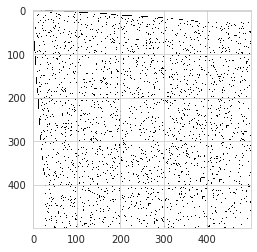

{(3, 4): {0: {'type': 'default'}}, (5, 4): {0: {'type': 'default'}}, (12, 1): {0: {'type': 'default'}}, (27, 4): {0: {'type': 'default'}}, (66, 5): {0: {'type': 'default'}}, (70, 4): {0: {'type': 'default'}}, (132, 1): {0: {'type': 'default'}}, (142, 7): {0: {'type': 'default'}}, (161, 7): {0: {'type': 'default'}}, (186, 3): {0: {'type': 'default'}}, (192, 2): {0: {'type': 'default'}}, (203, 5): {0: {'type': 'default'}}, (240, 7): {0: {'type': 'default'}}, (264, 1): {0: {'type': 'default'}}, (279, 2): {0: {'type': 'default'}}, (287, 2): {0: {'type': 'default'}}, (301, 2): {0: {'type': 'default'}}, (321, 7): {0: {'type': 'default'}}, (342, 5): {0: {'type': 'default'}}, (356, 7): {0: {'type': 'default'}}, (359, 0): {0: {'type': 'default'}}, (383, 5): {0: {'type': 'default'}}, (384, 1): {0: {'type': 'default'}}, (395, 2): {0: {'type': 'default'}}, (398, 1): {0: {'type': 'default'}}, (481, 7): {0: {'type': 'default'}}, (492, 0): {0: {'type': 'default'}}}
{0: {'type': 'default'}}


In [ ]:
# tensor-based operations examples

from py3plex.core import random_generators

# initiate an instance of a random graph
ER_multilayer = random_generators.random_multilayer_ER(500,
                                                       8,
                                                       0.05,
                                                       directed=False)

# some simple visualization
visualization_params = {"display": True}
ER_multilayer.visualize_matrix(visualization_params)

some_nodes = [node for node in ER_multilayer.get_nodes()][0:5]
some_edges = [node for node in ER_multilayer.get_edges()][0:5]

# random node is accessed as follows
print(ER_multilayer[some_nodes[0]])

# and random edge as
print(ER_multilayer[some_edges[0][0]][some_edges[0][1]])